In [1]:
import os
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [3]:
import patsy
import statsmodels

In [4]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
import numpy as np

In [26]:
os.chdir('/Users/nhutran/Documents/PhD/dormancy_redo')

In [5]:
df = pd.read_csv("/Users/nhutran/Documents/PhD/dormancy_redo/assays/assay_sdorm02_working_bio.csv")

In [21]:

#find design matrix for regression model using 'rating' as response variable 
y, X = dmatrices('rate ~ bio1+bio3+bio6+bio9+bio11', data=df, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable 
print(vif_df)

    variable         VIF
0  Intercept  154.565250
1       bio1   13.345847
2       bio3    3.369688
3       bio6   67.001711
4       bio9    3.921502
5      bio11  143.401871


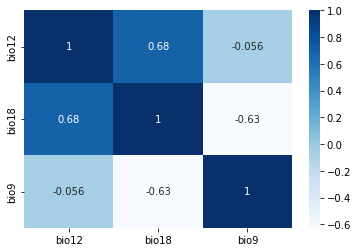

In [38]:
#visualising
#simple and fast option

# load the data
df1 = df[['bio12','bio18','bio9']]
# calculate the correlation matrix
corr = df1.corr()

#change lables if needed
#labels = {
#'bio9':'temperature of driest quarter',  
#'bio1':'annual temperature',
#'bio11':'temperature of coldest quarter',
#'bio6':'temperature of coldest month',
#'bio3':'isothermality'}

#corr = corr.rename(labels)

#make heatmap
myfig= sns.heatmap(corr, cmap="Blues", annot=True)
figure = myfig.get_figure()    
figure.savefig('multicorr_bio91812.png', dpi=800)

/var/folders/_n/6f9lbyk959q4h617mnpxbxx40000gn/T/ipykernel_84123/1355055706.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


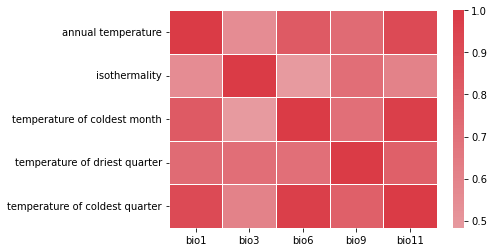

In [24]:
#make it fancy? 
#ver1
# labels need changing?
labels = {
'bio9':'temperature of driest quarter',  
'bio1':'annual temperature',
'bio11':'temperature of coldest quarter',
'bio6':'temperature of coldest month',
'bio3':'isothermality'}

corr = corr.rename(labels)

# remove the top right triange - duplicate information
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Colors
cmap = sns.diverging_palette(500, 10, as_cmap=True)

# uncomment this if you want only the lower triangle matrix 
# ans=sns.heatmap(corr, mask=mask,  linewidths=1, cmap=cmap, center=0)

ans=sns.heatmap(corr,  linewidths=1, cmap=cmap, center=0)

#save image 
#figure = ans.get_figure()    
#figure.savefig('correlations.png', dpi=800)

In [23]:
#ver 2, a table 
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/var/folders/_n/6f9lbyk959q4h617mnpxbxx40000gn/T/ipykernel_84123/3442623433.py:16: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,bio1,bio3,bio6,bio9,bio11
bio1,1.00,0.55,0.82,0.73,0.91
bio3,0.55,1.00,0.48,0.71,0.61
bio6,0.82,0.48,1.00,0.70,0.97
bio9,0.73,0.71,0.70,1.00,0.79
bio11,0.91,0.61,0.97,0.79,1.00
